<a href="https://colab.research.google.com/github/MichaelTotaro/github.io/blob/master/Summer_2025_INFX_639_Ch_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Chapter 4: Your First Artificial Neural Networks**

In Chapter 4, we focused on how to construct basic artificial intelligence applications, starting with constructing a basic feed forward network with TensorFlow. Artificial neural networks allow us to define complex non-linear problems, and as we take a dive into the mechanics of true deep learning, you'll begin to see how powerful AI applications can be with deep learning at the core.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import math
import tensorflow as tf
import os

### **I. Activation Functions**

Defining a sigmoid function from scratch:

In [ ]:
def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

Graph the sigmoid that we just created:

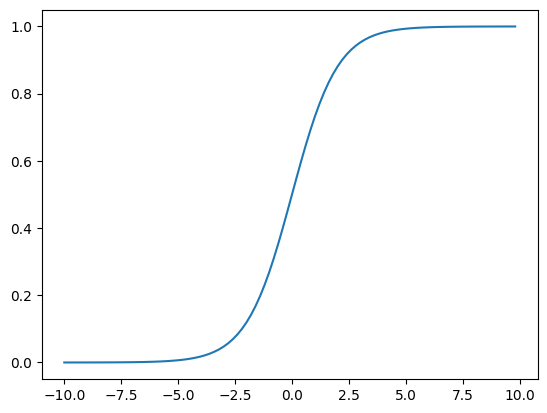

In [ ]:
x = np.arange(-10., 10., 0.2)
f = sigmoid(x)
plt.plot(x,f)
plt.show()

Defining a tanh function:

In [ ]:
tanh = np.tanh(np.arange(-5, 5, .1))


Graph the tanh function:

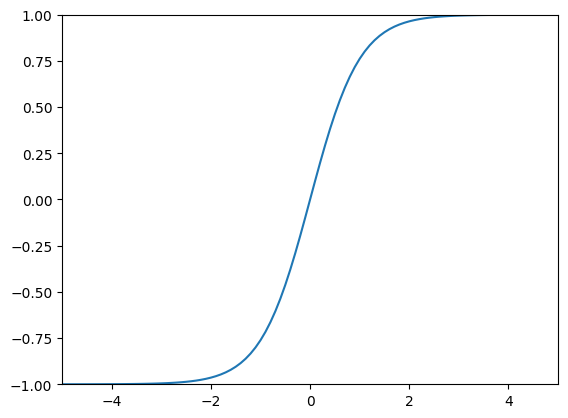

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(-5, 5, .1), tanh)
ax.set_ylim([-1.0, 1.0])
ax.set_xlim([-5,5])
plt.show()

### **II. Weights and Bias Factors**

Two key parts of ANNs are weights and biases. These elements help us squash and stretch our nonlinearities to help us better approximate a function

Weights change the "steepness" of a function:


In [ ]:
def single_output(x, w):
        return np.tanh(np.dot(x, w))

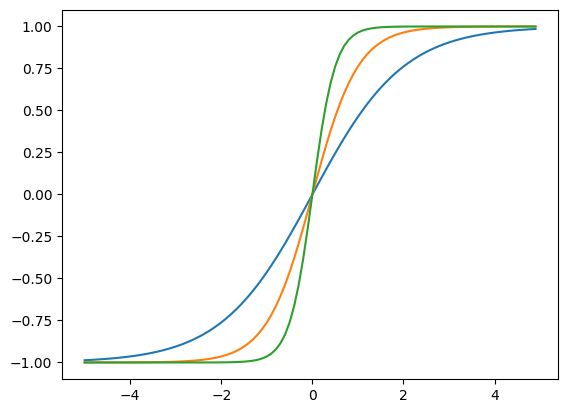

In [ ]:
x = np.arange(-5, 5, .1)
f1 = single_output(x, 0.5)
f2 = single_output(x, 1.0)
f3 = single_output(x, 2.0)
plt.plot(x,f1)
plt.plot(x,f2)
plt.plot(x,f3)
plt.show()

Bias factors "shift" a function:

In [ ]:
def single_output(x, w, b):
        return np.tanh(np.dot(x, w) + b)

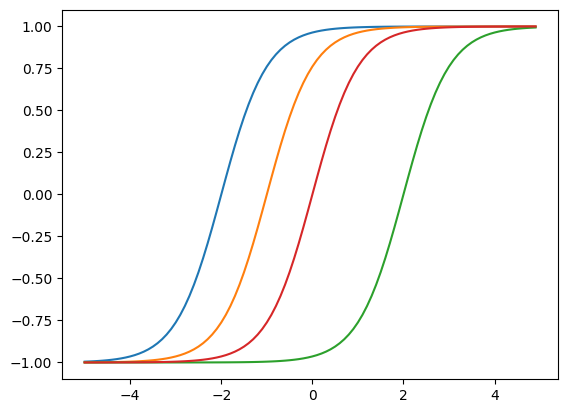

In [ ]:
x = np.arange(-5, 5, .1)
f1 = single_output(x, 1.0, 2.0)
f2 = single_output(x, 1.0, 1.0)
f3 = single_output(x, 1.0, -2.0)
f4 = single_output(x, 1.0, 0.0)
plt.plot(x,f1)
plt.plot(x,f2)
plt.plot(x,f3)
plt.plot(x,f4)
plt.show()

### **III. Defining Activation Functions from Scratch**

TensorFlow does not have PreLu, but we can define it from scratch. This example is adapted from Francois Chollet's version in the Keras library.

In [ ]:
## Parametric ReLu
def PreLu(x):
    alpha = tf.get_variable('alpha',x.get_shape()[-1], initializer=tf.constant_initializer(0.0), dtype=tf.float32)
    p_bound = tf.nn.relu(x)
    n_bound = alpha * (x - abs(x)) * 0.5
    return p_bound + n_bound

When utilizing maxout, TensorFlow has defined layers for us that we can import

In [ ]:
import tensorflow as tf

inputs = tf.random.normal([10, 20]) # Replace with your actual input
num_units = 10 # Replace with your desired number of units

# Define a simple maxout-like operation using Lambda
# This example assumes you want to take the maximum across a certain dimension.
# The actual Maxout layer typically works on groups of units.
# This is a simplified example to demonstrate the use of Lambda.
maxout_layer = tf.keras.layers.Lambda(lambda x: tf.reduce_max(x, axis=-1, keepdims=True))

output = maxout_layer(inputs)

print(output.shape) # Print the shape of the output to verify

(10, 1)


### **IV. Defining Loss Functions**

We can define cross-entropy loss from scratch:

In [ ]:
def CrossEntropy(yHat, y):
    if yHat == 1:
        return -log(y)
    else:
        return -log(1 - y)

Or, we can use the pre-defined TensorFlow version:

In [ ]:
# You need to provide actual tensors for labels and logits.
# These are just placeholders for demonstration.
labels = tf.constant([[0.0, 1.0], [1.0, 0.0]])  # Example one-hot encoded labels
logits = tf.constant([[1.0, 2.0], [2.0, 1.0]])  # Example logits from your model

tf.nn.softmax_cross_entropy_with_logits(
    labels=labels,
    logits=logits,
    name=None
)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.31326166, 0.31326166], dtype=float32)>

Running a linear regression in Tensorflow:

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# The filename is 'housing-data.csv'; it is stored in my (Totaro's) Google Drive.
# I've provided read-access to the file.

file_id = '1q9ETeokSywczA9FSRnSwWLOkekZ10Qb1'
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

data = pd.read_csv(download_url)
data.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


Since the data is in different units of measurement, we need to scale it.

In [ ]:
data = StandardScaler().fit_transform(data)

Define the features and labels; We'll regress square footage against price.

In [ ]:
features = data[:,0]
labels = data[:,3]

Let's take a look at how our data are distributed.

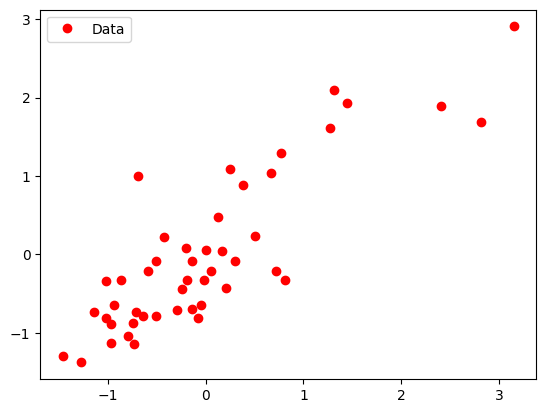

In [ ]:
plt.plot(features, labels, 'ro', label='Data')
plt.legend()
plt.show()

Define input placeholders for the input, weights, and bias factors.

In [ ]:
W = tf.Variable(np.random.randn(), name="weights")
b = tf.Variable(np.random.randn(), name="biases")

# Assign the features data to X
X = features

# Assign the labels data to Y
Y = labels

Create the linear model.

In [ ]:
linear_model = tf.add(tf.multiply(X, W), b)

Define the MSE loss.

In [ ]:
loss = tf.reduce_mean(tf.square(linear_model - Y))

Define the optimizer.

In [ ]:
# Define the optimizer.
# In TensorFlow 2.x, optimizers are typically in tf.optimizers or tf.keras.optimizers
# GradientDescentOptimizer from tf.train is deprecated. Use tf.optimizers.SGD instead.

optimizer = tf.optimizers.SGD(learning_rate=0.001)

# Define the training step function
@tf.function # Use tf.function for better performance
def train_step(X, Y, W, b, optimizer):
    # Use tf.GradientTape to record operations
    with tf.GradientTape() as tape:
        # Create the linear model within the tape context
        linear_model = tf.add(tf.multiply(X, W), b)
        # Define the MSE loss
        loss = tf.reduce_mean(tf.square(linear_model - Y))

    # Compute gradients of the loss with respect to the variables (W and b)
    gradients = tape.gradient(loss, [W, b])

    # Apply the computed gradients to update the variables
    optimizer.apply_gradients(zip(gradients, [W, b]))

    # Return the loss for monitoring
    return loss

# Note: You would now need a training loop that calls this train_step function
# for a specified number of epochs, iterating through your data (X and Y).
# The original code snippet only contained the optimizer definition, so
# the full training loop structure is not included here, but this
# train_step function is the corrected way to use the optimizer.

# Example of how a training loop might start (assuming X and Y are already defined):
# epochs = 1000
# for epoch in range(epochs):
#     current_loss = train_step(X, Y, W, b, optimizer)
#     if (epoch + 1) % 100 == 0:
#         print(f"Epoch {epoch+1}, Loss: {current_loss.numpy()}")

Define the hyperparemeters.

In [ ]:
epochs = 1000
display = 50

Run the training procedure.

Epoch: 0050 loss= 1.400856614 Weight Value= -0.091293566 Bias Value= 0.48154896
Epoch: 0100 loss= 1.195499539 Weight Value= -0.0011572901 Bias Value= 0.4356799
Epoch: 0150 loss= 1.027401090 Weight Value= 0.080393225 Bias Value= 0.39418
Epoch: 0200 loss= 0.889801204 Weight Value= 0.15417585 Bias Value= 0.3566331
Epoch: 0250 loss= 0.777166545 Weight Value= 0.22093044 Bias Value= 0.32266277
Epoch: 0300 loss= 0.684967518 Weight Value= 0.28132644 Bias Value= 0.29192814
Epoch: 0350 loss= 0.609496474 Weight Value= 0.33596957 Bias Value= 0.2641211
Epoch: 0400 loss= 0.547718406 Weight Value= 0.38540775 Bias Value= 0.23896271
Epoch: 0450 loss= 0.497148871 Weight Value= 0.4301368 Bias Value= 0.21620074
Epoch: 0500 loss= 0.455754459 Weight Value= 0.47060513 Bias Value= 0.19560695
Epoch: 0550 loss= 0.421870321 Weight Value= 0.5072188 Bias Value= 0.17697483
Epoch: 0600 loss= 0.394133836 Weight Value= 0.54034495 Bias Value= 0.16011742
Epoch: 0650 loss= 0.371429741 Weight Value= 0.57031566 Bias Value=

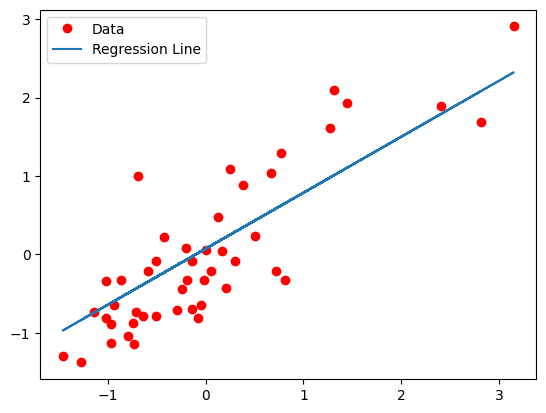

In [ ]:
# Run the training procedure using TensorFlow 2.x eager execution
# We no longer need tf.Session

# The variables W and b were already defined using tf.Variable
# tf.global_variables_initializer() is not needed in eager execution

# Call the train_step function in a loop
for epoch in range(epochs):
    # Pass the features, labels, variables, and optimizer to the train_step function
    current_loss = train_step(tf.constant(features, dtype=tf.float32),
                              tf.constant(labels, dtype=tf.float32),
                              W,
                              b,
                              optimizer)

    if (epoch+1) % display == 0:
        # To get the value of the loss and variables, use .numpy()
        print("Epoch:", '%04d' % (epoch+1), "loss=", "{:.9f}".format(current_loss.numpy()), \
            "Weight Value=", W.numpy(), "Bias Value=", b.numpy())

# Plot the results after training
plt.plot(features, labels, 'ro', label='Data')
# Plot the regression line using the final learned weights and bias
plt.plot(features, W.numpy() * features + b.numpy(), label='Regression Line')
plt.legend()
plt.show()

### **V. Building a Feed Forward Network**

Start with our imports. MNIST is readily available for use within Tensorflow; it's like the "Hello World" of deep learning.

In [ ]:
import tensorflow as tf
# from tensorflow.examples.tutorials.mnist import input_data # Remove this line

## Import the MNIST Data using tf.keras.datasets
# mnist = input_data.read_data_sets("/tmp/data/", one_hot=True) # Remove this line

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# You might need to flatten and normalize the data depending on your model architecture later.
# For example:
# x_train = x_train.reshape(x_train.shape[0], -1).astype('float32') / 255.0
# x_test = x_test.reshape(x_test.shape[0], -1).astype('float32') / 255.0

# If you need one-hot encoding for your labels:
# y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
# y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Note: The variable name 'mnist' used in the original code is no longer used in this approach.
# The data is loaded directly into x_train, y_train, x_test, and y_test.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Looking at our MNIST example, we can now set up our overall network parameters:

In [ ]:
## Size of the input data
input_layer_size = 784

## Define the size of the hidden layers; We want them to be smaller than the input
hidden_layer_one = 256
hidden_layer_two = 256

## Size of the potential output classes
number_classes = 10

Initialize our weight and bias factors in the TensorFlow graph:

In [ ]:
## Define the weights and biases as a dictionary
weights = {
 'w1': tf.Variable(tf.random.normal([input_layer_size, hidden_layer_one])),
 'w2': tf.Variable(tf.random.normal([hidden_layer_one, hidden_layer_two])),
 'w_out': tf.Variable(tf.random.normal([hidden_layer_two, number_classes]))
}

biases = {
 'b1': tf.Variable(tf.random.normal([hidden_layer_one])),
 'b2': tf.Variable(tf.random.normal([hidden_layer_two])),
 'b_out': tf.Variable(tf.random.normal([number_classes]))
}

Next, create the placeholder variables for our network:

In [ ]:
## Size of the input data
input_layer_size = 784

## Define the size of the hidden layers; We want them to be smaller than the input
hidden_layer_one = 256
hidden_layer_two = 256

## Size of the potential output classes
number_classes = 10

## Define the weights and biases as a dictionary
weights = {
 'w1': tf.Variable(tf.random.normal([input_layer_size, hidden_layer_one])),
 'w2': tf.Variable(tf.random.normal([hidden_layer_one, hidden_layer_two])),
 'w_out': tf.Variable(tf.random.normal([hidden_layer_two, number_classes]))
}

biases = {
 'b1': tf.Variable(tf.random.normal([hidden_layer_one])),
 'b2': tf.Variable(tf.random.normal([hidden_layer_two])),
 'b_out': tf.Variable(tf.random.normal([number_classes]))
}

Define the training hyperparameters:

In [ ]:
## Network Parameters
learning_rate = 0.001
epochs = 15
batch_size = 100
display = 1
job_dir = 'mnist_example'

Next, let's actually create our basic, feed forward network.

In [ ]:
def feedforward_network(x, weights, biases):

    ## First layer; a hidden layer with RELU activation
    layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['w1']), biases['b1']))

    ## Second layer; a hidden layer with RELU activation function
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['w2']),biases['b2']))

    ## Output layer; utilizes a linear activation function
    outputLayer = tf.matmul(layer_2, weights['w_out']) + biases['b_out']

    ## Return the Last Layer
    return outputLayer

Lastly before training, we'll define our loss and optimizer, and initialize all of the variables.

In [ ]:
# Ensure required libraries are imported
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt # Assuming this is needed for plotting later

# Load the MNIST dataset again (or ensure it's loaded from a previous cell)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

## Size of the input data
input_layer_size = 784

## Define the size of the hidden layers; We want them to be smaller than the input
hidden_layer_one = 256
hidden_layer_two = 256

## Size of the potential output classes
number_classes = 10

## Define the weights and biases as a dictionary
# Ensure weights are initialized with tf.float32
weights = {
 'w1': tf.Variable(tf.random.normal([input_layer_size, hidden_layer_one], dtype=tf.float32)),
 'w2': tf.Variable(tf.random.normal([hidden_layer_one, hidden_layer_two], dtype=tf.float32)),
 'w_out': tf.Variable(tf.random.normal([hidden_layer_two, number_classes], dtype=tf.float32))
}

# Ensure biases are initialized with tf.float32
biases = {
 'b1': tf.Variable(tf.random.normal([hidden_layer_one], dtype=tf.float32)),
 'b2': tf.Variable(tf.random.normal([hidden_layer_two], dtype=tf.float32)),
 'b_out': tf.Variable(tf.random.normal([number_classes], dtype=tf.float32))
}

## Network Parameters
learning_rate = 0.001
epochs = 15
batch_size = 100
display = 1
job_dir = 'mnist_example'

def feedforward_network(x, weights, biases):

    ## First layer; a hidden layer with RELU activation
    layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['w1']), biases['b1']))

    ## Second layer; a hidden layer with RELU activation function
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['w2']),biases['b2']))

    ## Output layer; utilizes a linear activation function
    outputLayer = tf.matmul(layer_2, weights['w_out']) + biases['b_out']

    ## Return the Last Layer
    return outputLayer

# Prepare the input data (features)
# Flatten the images and convert to float32
x = tf.constant(x_train.reshape(x_train.shape[0], -1).astype('float32'), dtype=tf.float32)

# Prepare the label data
# Convert integer labels to one-hot encoding and to float32
y = tf.constant(tf.keras.utils.to_categorical(y_train, num_classes=number_classes), dtype=tf.float32)


##Construct the model
# Pass the prepared x tensor to the network
network_output = feedforward_network(x, weights, biases)

## Define the optimizer and the loss function for the network
# Using tf.keras.optimizers as tf.train is deprecated
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# loss_func is defined correctly using tf.nn.softmax_cross_entropy_with_logits
loss_func = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=network_output, labels=y))

## Checkpoint Saver (Note: This part might need further adjustment for TF2.x saving)
# os.path.join is correct, but the saving mechanism might differ in TF2.x eager execution
save_model = os.path.join(job_dir, 'saved_mnist.ckpt')



Launch the training process by utilizing a Tensorflow session.

In [ ]:
# Define a training step function for eager execution
@tf.function
def train_step(images, labels, weights, biases, optimizer):
    with tf.GradientTape() as tape:
        predictions = feedforward_network(images, weights, biases)
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions, labels=labels))

    gradients = tape.gradient(loss, list(weights.values()) + list(biases.values()))
    optimizer.apply_gradients(zip(gradients, list(weights.values()) + list(biases.values())))
    return loss

# Example training loop (add this to train the model)
print("Starting training...")
for epoch in range(epochs):
    # Iterate over batches (you would typically use tf.data.Dataset for this)
    # For simplicity, let's just use the full dataset for now
    current_loss = train_step(x, y, weights, biases, optimizer)

# Define a training step function for eager execution
@tf.function
def train_step(images, labels, weights, biases, optimizer):
    with tf.GradientTape() as tape:
        predictions = feedforward_network(images, weights, biases)
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions, labels=labels))

    gradients = tape.gradient(loss, list(weights.values()) + list(biases.values()))
    optimizer.apply_gradients(zip(gradients, list(weights.values()) + list(biases.values())))
    return loss

# Example training loop (add this to train the model)
print("Starting training...")
for epoch in range(epochs):
    # Iterate over batches (you would typically use tf.data.Dataset for this)
    # For simplicity, let's just use the full dataset for now
    current_loss = train_step(x, y, weights, biases, optimizer)

    if (epoch+1) % display == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {current_loss.numpy():.4f}")

print("Training finished.")


Starting training...
Starting training...
Epoch 1/15, Loss: 52871.7656
Epoch 2/15, Loss: 51910.6094
Epoch 3/15, Loss: 50981.5352
Epoch 4/15, Loss: 50083.1719
Epoch 5/15, Loss: 49215.1797
Epoch 6/15, Loss: 48378.4961
Epoch 7/15, Loss: 47570.9258
Epoch 8/15, Loss: 46792.0586
Epoch 9/15, Loss: 46040.2500
Epoch 10/15, Loss: 45316.5117
Epoch 11/15, Loss: 44618.9258
Epoch 12/15, Loss: 43947.5703
Epoch 13/15, Loss: 43302.2031
Epoch 14/15, Loss: 42680.8906
Epoch 15/15, Loss: 42081.2031
Training finished.
